# 上机实验9：神经网络

## 任务1：神经元模型
- 给定数据集X和y
- 请补全以下代码以实现一个简单的神经元模型（即不包含隐层），并计算模型的参数向量w_vec

> 待补全代码

In [1]:
import numpy as np
import pandas as pd
# 输入X和y
X = np.array([ [0,0,1],
[1,1,1],
[1,0,1],
[0,1,1]])

y = np.array([[0,1,1,0]]).T

# 请在下方作答 #
# Sigmoid激活函数以及其导数
def sigmoid(x, derivative = False):
    # 计算sigmoid的输出
    # sigmoid_value = ________________
    sigmoid_value = 1 / (1 + np.exp(-x))
    if derivative == False:     
        return sigmoid_value
    
    elif derivative == True:
        # 计算sigmoid的导数
        # return ________________
        return sigmoid_value * (1 - sigmoid_value)


# 迭代次数
iter_num  = 1000
eta = 0.1

# 初始化权重向量w
num, dim = X.shape
w_vec = np.ones((dim, 1))

for iter in range(iter_num):
    
    ## X通过权重向量w_vec，实现线性加和，结果为z1
    # z_1 =  ________________
    z_1 = np.dot(X, w_vec)
    
    # 经过激活函数Sigmoid，获得输出a_1
    # a_1 = ________________
    a_1 = sigmoid(z_1)
      
    # 模型输出a_1与真实值的误差
    error = a_1 - y
    
    # 权重更新
    # w_vec_delta = ________________
    w_vec_delta = np.dot(X.T, error * sigmoid(a_1, derivative=True))
    w_vec = w_vec + eta*w_vec_delta  

print (w_vec)

[[ 0.90213667]
 [20.61365787]
 [40.08640154]]


## 任务2： 感知机

1．感知机是根据输入实例的特征向量$x$对其进行二类分类的线性分类模型：

$$
f(x)=\operatorname{sign}(w \cdot x+b)
$$

感知机模型对应于输入空间（特征空间）中的分离超平面$w \cdot x+b=0$。

2．感知机学习的策略是极小化损失函数：

$$
\min _{w, b} L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)
$$

损失函数对应于误分类点到分离超平面的总距离。

3．感知机学习算法是基于随机梯度下降法的对损失函数的最优化算法，有原始形式和对偶形式。算法简单且易于实现。原始形式中，首先任意选取一个超平面，然后用梯度下降法不断极小化目标函数。在这个过程中一次随机选取一个误分类点使其梯度下降。
 
4．当训练数据集线性可分时，感知机学习算法是收敛的。感知机算法在训练数据集上的误分类次数$k$满足不等式：

$$
k \leqslant\left(\frac{R}{\gamma}\right)^{2}
$$

当训练数据集线性可分时，感知机学习算法存在无穷多个解，其解由于不同的初值或不同的迭代顺序而可能有所不同。

5. 随机梯度下降算法 Stochastic Gradient Descent：

随机抽取一个误分类点使其梯度下降。

$w = w + \eta y_{i}x_{i}$

$b = b + \eta y_{i}$

当实例点被误分类，即位于分离超平面的错误侧，则调整$w$, $b$的值，使分离超平面向该无分类点的一侧移动，直至误分类点被正确分类。


**使用iris数据集中两个类别的数据和[sepal length，sepal width]作为特征，进行感知机分类。**

1. 自定义感知机模型，实现iris数据分类；
2. 调用sklearn中Perceptron函数来分类；
3. 验证感知机为什么不能表示异或（选做）。

### 1. 自定义感知机模型，实现iris数据分类

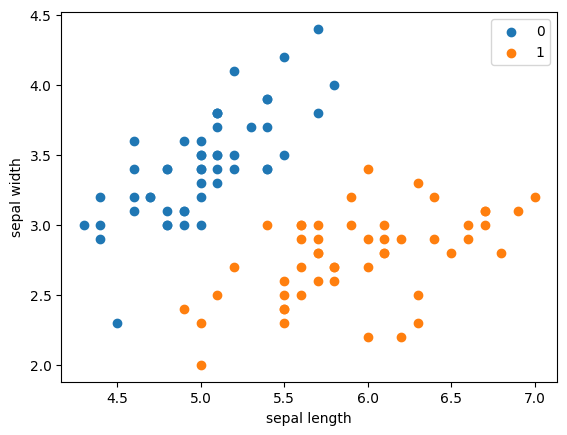

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df.label.value_counts()

data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

> 待补全代码

In [3]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1

    def f(self, x, w, b):
        # y = ________________
        y = np.dot(x, w) + b
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                # if ________________ #判断样本被误分类
                #     self.w = ________________
                #     self.b = ________________
                #     wrong_count += 1
                if y * (np.dot(X, self.w) + self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'

    def score(self):
        pass

D:\temp\ipykernel_23664\4246253607.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
D:\temp\ipykernel_23664\4246253607.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')


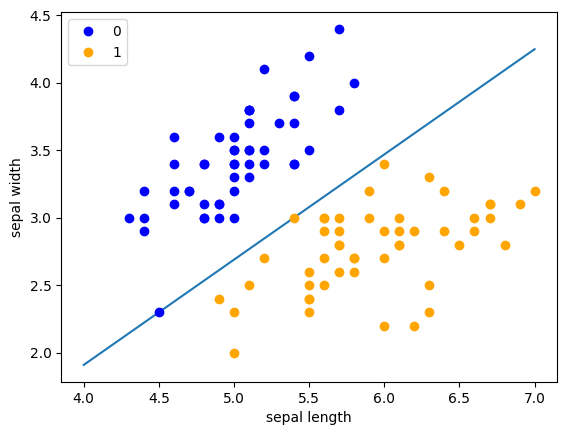

In [4]:
# 进行模型训练
perceptron = Model()
perceptron.fit(X, y)

x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### 2. 调用sklearn中Perceptron函数来分类

In [5]:
import sklearn
from sklearn.linear_model import Perceptron
# 调用sklearn中Perceptron函数进行分类
# 请在下方补全代码

clf = Perceptron()
clf.fit(X, y)

# Weights assigned to the features.
print(clf.coef_)
# 截距 Constants in decision function.
print(clf.intercept_)

[[ 23.2 -38.7]]
[-5.]


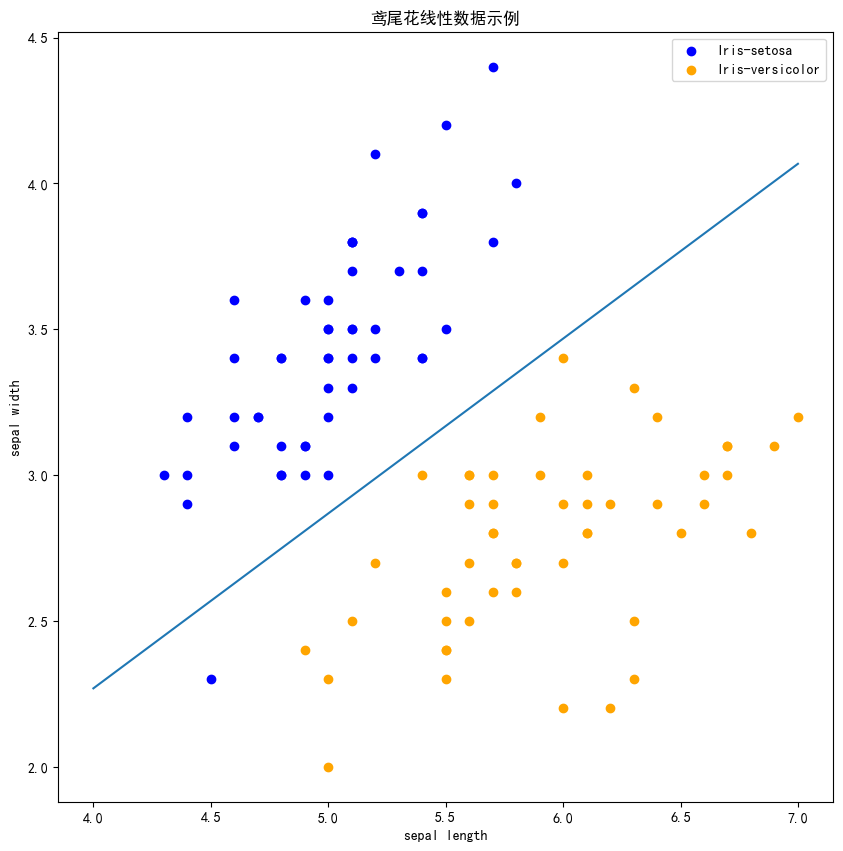

In [6]:
# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### 3. 验证感知机为什么不能表示异或（选做）

[[0. 0.]]
[0.]


D:\temp\ipykernel_23664\1148588598.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x[:2,0],x[:2,1],'bo',color='red',label='1')
D:\temp\ipykernel_23664\1148588598.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x[2:4,0],x[2:4,1],'bo',color='blue',label='-1')
D:\temp\ipykernel_23664\1148588598.py:23: RuntimeWarning: invalid value encountered in divide
  y_ = -(clf.coef_[0][0]*x_points + clf.intercept_)/clf.coef_[0][1]


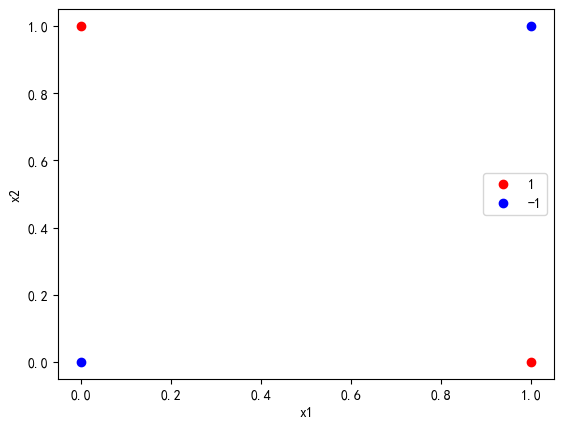

In [10]:
x=np.array([[1,0],[0,1],[0,0],[1,1]])
y=np.array([1, 1, -1, -1])
plt.plot(x[:2,0],x[:2,1],'bo',color='red',label='1')
plt.plot(x[2:4,0],x[2:4,1],'bo',color='blue',label='-1')
plt.xlabel('x1')
plt.ylabel('x2')

# 请在下方作答
from sklearn.linear_model import Perceptron
import numpy as np

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])

clf = Perceptron()
clf.fit(X, y)

print(clf.coef_)
print(clf.intercept_)

# 画感知机的线
x_points = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_points + clf.intercept_)/clf.coef_[0][1]
# 因为这里的coef_[0][1]=0，所以运算会出错
plt.plot(x_ponits, y_)
plt.legend()
plt.show()

